# Kaggle Titanic - First Competition

### Import liraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

In [2]:
mainpath = '/Users/n218312/Documents/MachineLearning/kaggle/competitions/titanic/'
train_data_path = os.path.join(mainpath, 'datasets/train.csv')
test_data_path = os.path.join(mainpath, 'datasets/test.csv')

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train=pd.read_csv(train_data_path)  # Loading the train dataset
test=pd.read_csv(test_data_path)    # Loading the test dataset

target=train['Survived']

In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data.shape

(891, 12)

In [6]:
#detect outliers

def detect_outlier(df,n,cols):
    outlier_indices = []
    for i in cols:
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5*IQR
        outlier_index_list = df[(df[i] < Q1-outlier_step) | (df[i] > Q3+outlier_step)].index
        outlier_indices.extend(outlier_index_list)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)  
    return multiple_outliers

#detect_outlier(train,3,['Age', 'SibSp', 'Parch', 'Fare'])
outliers_to_drop = detect_outlier(train,3,['Age', 'SibSp', 'Parch', 'Fare'])
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

#Basic info about the dataset

print('Shape of train dataset:-',train.shape)
print('Shape of test dataset:-' ,test.shape)

#Info about datatype and statistical model

print('\n')
print(train.info())
train.describe()

Shape of train dataset:- (891, 12)
Shape of test dataset:- (418, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Summary of basic statistics

#### Describe gives statistical information about dataset columns

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Lets see if there are missing values in the dataset

In [10]:
null_columns=train_data.columns[train_data.isnull().any()]
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

### Plots and visualizations

In [12]:
%matplotlib inline

#### Distributions of survived people

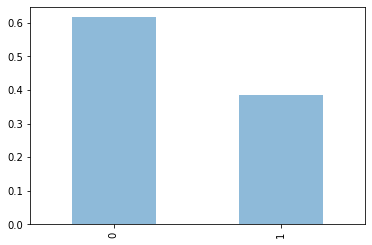

In [13]:
#Normalize Data to see percentage of survival people
train_data.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

### Relation Between Variables

#### Age vs Survived

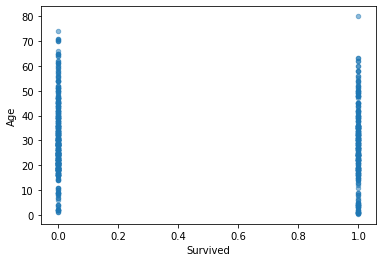

In [14]:
# Since we have Age of all the passengers, we can see relation between Age and Survival
train_data.plot(kind='scatter', x='Survived',y='Age', alpha=0.5)

#### Distribution of Pclass

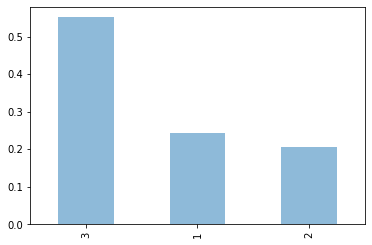

In [15]:
train_data['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)

#### Pclass vs Age

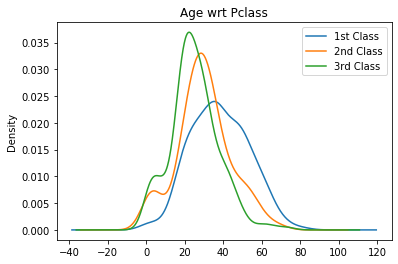

In [16]:
pclass_values = sorted(train_data['Pclass'].unique().tolist())

for c in pclass_values:
    train_data.loc[train_data['Pclass'] == c, 'Age'].plot(kind="kde")
    plt.title("Age wrt Pclass")
    plt.legend(("1st Class","2nd Class","3rd Class"))


#### Embarked Distribution

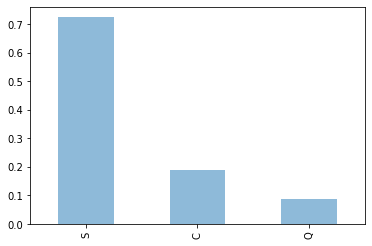

In [17]:
train_data.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

#### Columns with missing values

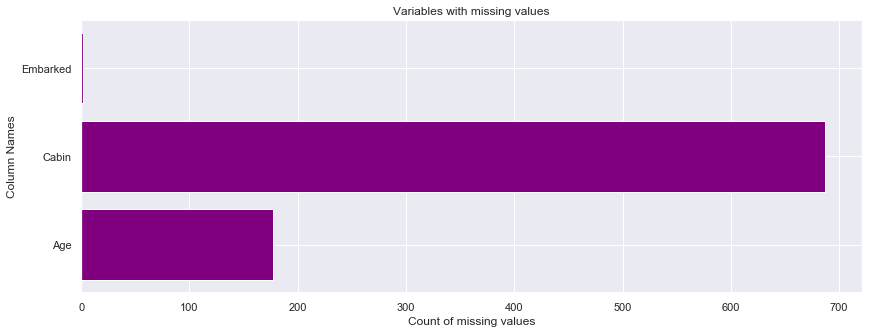

In [18]:
sns.set(font_scale=1)

#pd.options.display.mpl_style = 'default'

labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(train_data[col].isnull().sum())
    
ind = np.arange(len(labels))

width=0.6
fig, ax = plt.subplots(figsize=(14,5))

rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind)
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

#### Survival by Gender

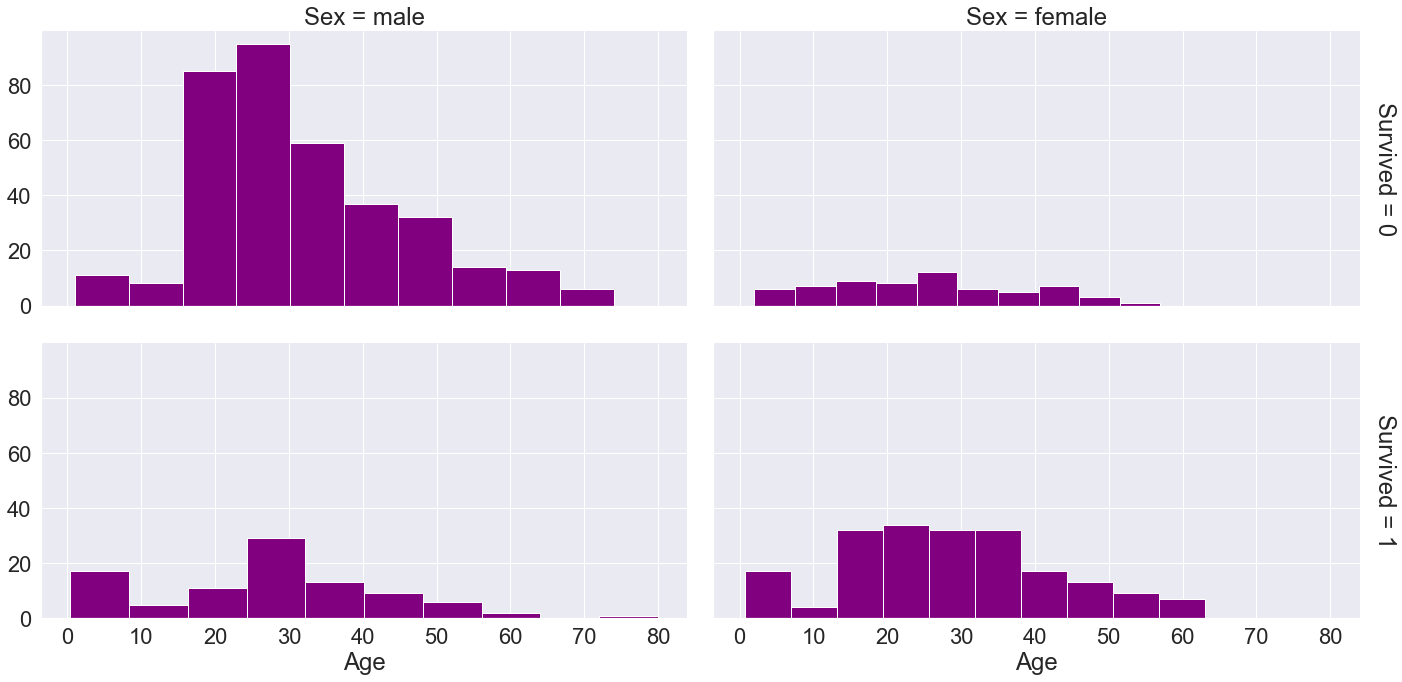

In [19]:
sns.set(font_scale=2)
g = sns.FacetGrid(train_data, col='Sex', row='Survived', margin_titles=True, height=5, aspect=2)
g.map(plt.hist,'Age',color='Purple')

#### Relation between Fare and Age

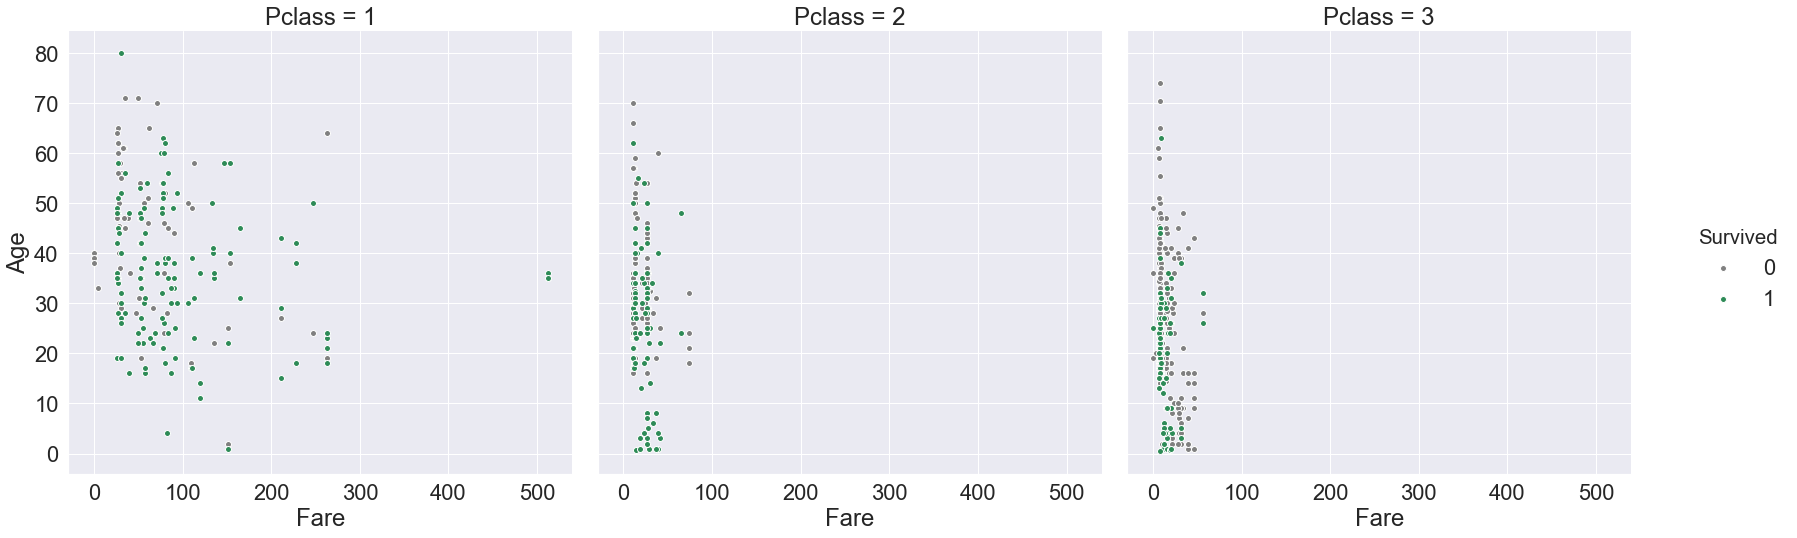

In [20]:
sns.set(font_scale=2)
g = sns.FacetGrid(train_data, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}, height=8, aspect=1)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

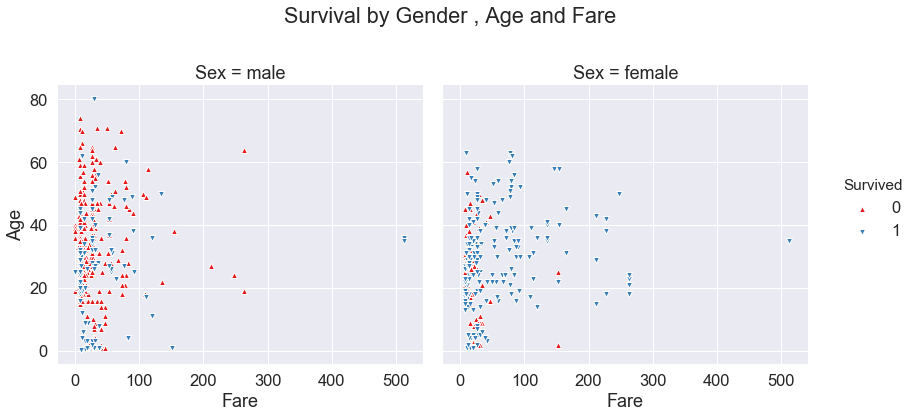

In [21]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(train_data, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),height=6, aspect=1)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

#### Survival by Class and Sex

/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


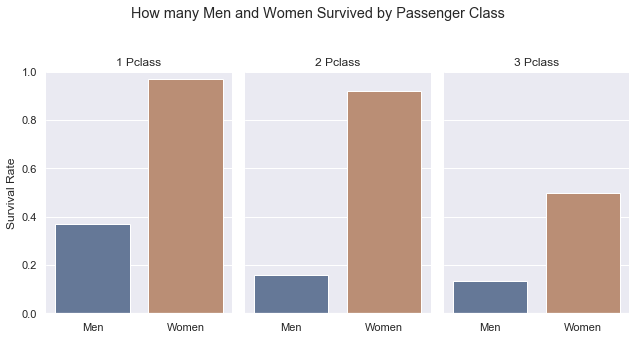

In [22]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=train_data, saturation=.5,
                    kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

#### Correlation Matrix

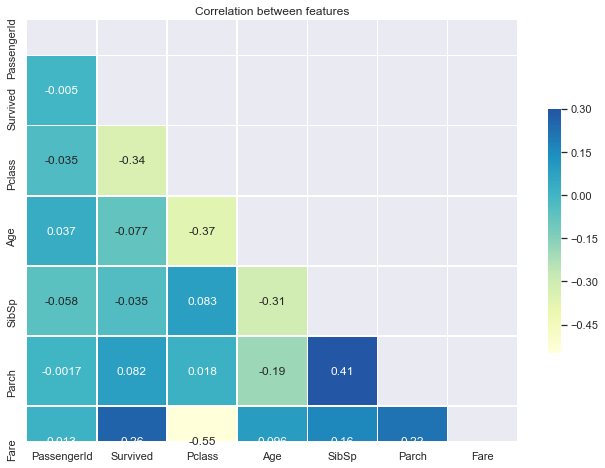

In [23]:
corr_matrix = train_data.corr() 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(11,9))

sns.heatmap(corr_matrix,vmax=.3, linewidths=.5,center=0,mask=mask,cbar_kws={"shrink": .5},
            square=True,annot=True,cmap='YlGnBu',linecolor="white")

plt.title('Correlation between features');

In [24]:
train_data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### Missing Values

* Age and Cabin seems to be uncomplete for all the rows

In [25]:
print("Number of rows without Age: ", pd.isnull(train_data["Age"]).sum())
print("Number of rows without Cabin: ", pd.isnull(train_data["Cabin"]).sum())
print("Number of rows without Sex: ", pd.isnull(train_data["Sex"]).sum())
print("Number of rows without Embarked: ", pd.isnull(train_data["Embarked"]).sum())

Number of rows without Age:  177
Number of rows without Cabin:  687
Number of rows without Sex:  0
Number of rows without Embarked:  2


**Lets see Embarked missing values**

In [26]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


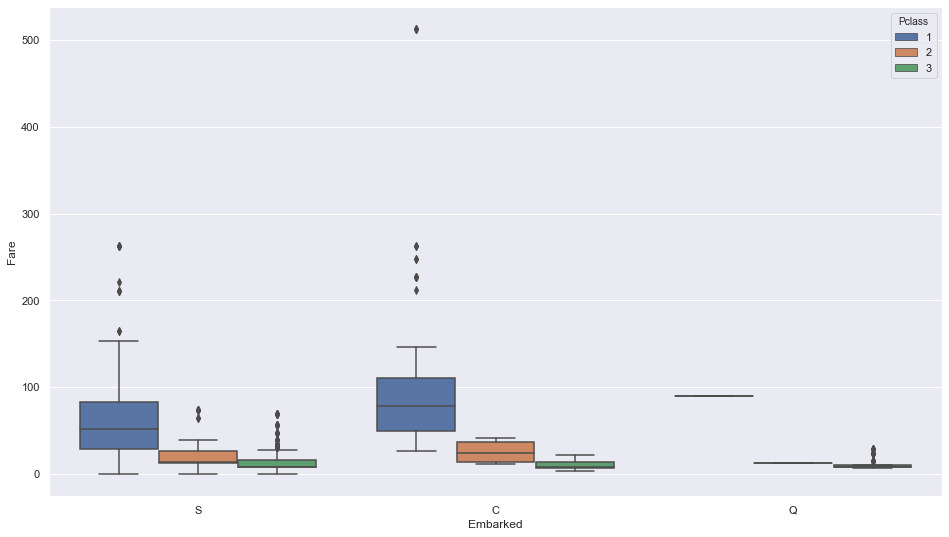

In [27]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=train_data)

In [28]:
## Set missing values at embarked column as C
train_data["Embarked"] = train_data["Embarked"].fillna("C")

### Feature Engineering

**Where were the place of passengers on the boat ?**

In [29]:
train_data["Deck"] = train_data["Cabin"].str[0]
test_data["Deck"] = test_data["Cabin"].str[0]

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [31]:
test_data["Deck"].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [32]:
train_data["Deck"] = train_data["Deck"].fillna("Z")
test_data["Deck"] = test_data["Deck"].fillna("Z")

#### Get name title

In [33]:
def substrings_in_string(big_string, substrings):
    """Find substring in a strings.

        Keyword arguments:
        big_string -- String where to look for 
        substring -- string to find
    """
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [34]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

#### Create new column with the title names

In [35]:
train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x, title_list))
test_data['Title']=test_data['Name'].map(lambda x: substrings_in_string(x, title_list))

#### Replace all titles with standard values Mr, Mrs, Miss, Master

In [36]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
train_data['Title']=train_data.apply(replace_titles, axis=1)
test_data['Title']=test_data.apply(replace_titles, axis=1)

#### Calculate Family size column

In [37]:
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']
test_data['Family_Size']=test_data['SibSp']+test_data['Parch']

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,Mr,0


### Convert Categorical variables to numerical

In [39]:
def cat_to_num(df, col_vars):
    '''Cat to num convert categorical columns to numeric'''
    from sklearn.preprocessing import LabelEncoder
    labelEnc = LabelEncoder()
    for col in col_vars:
        df[col]=labelEnc.fit_transform(df[col])

    return df

In [40]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
Title           object
Family_Size      int64
dtype: object

In [41]:
col_vars = ["Embarked", "Deck", "Sex", "Title"]

test_data = cat_to_num(test_data, col_vars)
train_data = cat_to_num(train_data, col_vars)

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,3,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,3,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,2,0


#### Age distribution

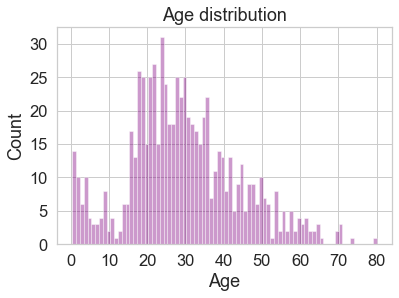

In [43]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train_data["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="Purple").set_title("Age distribution")

    plt.ylabel("Count");

In [44]:
def fill_na_median(df,column):
    '''Fill column with median helped by Pclass'''
    df[column] = df.groupby('Pclass')[column].transform(lambda x: x.fillna(x.median()))
    return df

#### Cleaning missing values of Age and Fare

In [45]:
## Fill na Values of Age and Fare
train_data = fill_na_median(train_data,"Age")
test_data = fill_na_median(test_data,"Age")

train_data = fill_na_median(train_data,"Fare")
test_data = fill_na_median(test_data,"Fare")

In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,1.531987,6.716049,1.860831,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.794531,2.460739,0.721066,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,8.000000,2.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000,8.000000,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000,8.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,3.000000,10.000000


In [72]:
#Extracting common ages into group
train_data['Age_cat'] = pd.qcut(train_data['Age'],q=[0, .16, .33, .49, .66, .83, 1], labels=False, precision=1)
test_data['Age_cat'] = pd.qcut(test_data['Age'],q=[0, .16, .33, .49, .66, .83, 1], labels=False, precision=1)

col_vars = ["Age_cat"]

test_data = cat_to_num(test_data, col_vars)
train_data = cat_to_num(train_data, col_vars)

In [73]:
train_data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.047255
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.174199
Deck          -0.301116
Title         -0.062139
Family_Size    0.016639
Age_cat        0.005454
Name: Survived, dtype: float64

## Survival prediction

### Modelling

In [74]:
feature_cols = ["Sex", "Deck", "Fare","Pclass","Embarked","Age","Parch","SibSp", "Title", "Family_Size", "Age_cat"]

X = train_data[feature_cols]
Y = train_data["Survived"]

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
np.random.seed(23)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25) 


In [77]:
clf = LogisticRegression(max_iter=100000).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(roc_auc_score(y_pred, y_test))

print(clf.score(X_test,y_test))

0.775018395879323
0.7937219730941704


/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "SVC" : SVC(probability=True),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier(),
          "GaussianNB" : GaussianNB(),
          "LinearDiscriminantAnalysis" : LinearDiscriminantAnalysis(),
          "QuadraticDiscriminantAnalysis" : QuadraticDiscriminantAnalysis()}
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Random seed for reproducible results
    np.random.seed(19)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predicting target values
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        #model_scores[name] = model.score(X_test, y_test)
        model_scores[name] = roc_auc_score(y_pred, y_test)
    return model_scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/n218312/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/n218312/opt/anaconda3/lib/pyth

{'KNN': 0.714597902097902,
 'Logistic Regression': 0.775018395879323,
 'Random Forest': 0.7593150684931508,
 'SVC': 0.7116794543904519,
 'DecisionTreeClassifier': 0.7641030292037003,
 'AdaBoostClassifier': 0.7972961224134933,
 'GradientBoostingClassifier': 0.8153941829314963,
 'GaussianNB': 0.775887819449054,
 'LinearDiscriminantAnalysis': 0.7593150684931508,
 'QuadraticDiscriminantAnalysis': 0.7877237851662404}

### GradientBoostingClassifier

In [79]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Submission file

In [80]:
X_pred = test_data[feature_cols]

y_submission_pred = gbc.predict(X_pred)

sub = pd.DataFrame()
sub['PassengerId'] = test_data['PassengerId']
sub['Survived'] = y_submission_pred
sub.to_csv('datasets/submission_titanic.csv', index=False)


In [81]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
